# APS106 - Lab 3

In this week’s lab you will practice using loops and conditional statements to build a system for designed to monitor the value of a sensor over time. 

## Lab Objectives
* Design a function to make decisions using conditional statements
* Utilize while loops to repeat segments of code until a condition is satisfied
* Practice writing and debugging boolean expressions, conditionals, and loops
* Design a comprehensive set of test cases

## Lab Deliverables
The following files must be submitted to Gradescope prior to the assignment deadline
* `lab3.ipynb`

For this assignment, you should complete the following functions:
* `heat_control_hysteresis_thresh`
* `newton_raphson_sqrt`
* `thresh_crossing_counter`

An additional function is provided within the starter code. You may use this function to complete and test your code in part 2.2. **You are not expected to modify this function.**
* `get_sensor_measurement`

### Gradescope reminders
Your assignment will be graded using 10 test cases on Gradescope. You will be able to see the results of all of these tests before the deadline.
However, you will only be able to see the inputs of the first **five** test cases before the submission deadline. 
If you are not passing any of the test cases, there is an error (bug) in your submission that you will need to identify and correct. 

**IMPORTANT**: 
* Do not change the file name or function names
* Do not use input() inside your program


## Problem
Your task this week will be broken down into two parts. In part 1 you will create a function to check whether a sensor measurement is above or below a particular threshold value. In part 2 you will write functions that will be designed to simulate tests of your sensor system to check whether your thresholding function works correctly. By completing both parts of this assignment, you will get a taste of the design process used by engineers who develop software for interface with physical systems and sensors.

### Part 1 - Hysteresis Threshold
For this assignment, we will imagine that we are building a system to monitor the temperature inside a furnace used in chemical industrial processes like cement production. While your colleagues design the electronics and mechanical components for the sensor and heater circuits, you have been asked to write the software that will read measurements from the temperature sensor and determine when to turn the heater on or off. Your team wishes to use the following simple piecewise function to describe the state of the heater as a function of the temperature, $T$:
$$
state(T) =
\begin{cases} 
on & \text{if } T < T_{desired} \\
off & \text{if } T \geq T_{desired}
\end{cases}
$$
that is, when the current temperature $T$ is less than the desired temperate, $T_{desired}$, the heater should be on, otherwise the heater should be off. 

Your task for this part of the lab will be to write a function, `heat_control_hysteresis_thresh`, that determines whether the heater should be on or off based on the current temperature measurement from the sensor. Before you start, however, your colleagues inform you that the sensor readings are "noisy" (see figure 1) and using the simple piecewise threshold function above will result in the heater excessively switching between on and off states.

<img src="images/simple_thresh2.png" alt="simple thresh" width="800"/>

**Fig 1**. Noise from the sensor readings results in excessive switching of the heater

Because excessive switching is expected to reduce the efficiency and the lifespan of the heater, you come up with a better design. To avoid this excessive switching, you decide to use a hysteresis thresholding function:
$$
next\_state(T, current\_state) =
\begin{cases} 
on & \text{if } T < T_{desired} - \alpha \\
off & \text{if } T > T_{desired} + \alpha \\
current\_state & |T - T_{desired}| \leq \alpha
\end{cases}
$$
where $T$ is the current temperature reading from the sensor, $T_{desired}$ is the desired temperate, $current\_state$ is the current state of the heater (on or off), $next\_state$ is the next state of the heater (on or off), and $\alpha$ is a constant. Now our function has thresholds at $T_{desired} \pm \alpha$. If $|T-T_{desired}| \leq \alpha$, then the heater should remain in the same state (e.g., if the heater is on, it should remain on). Figure 2 shows the behaviour of the heater using this control scheme. 

<img src="images/hyst_thresh2.png" alt="hyst thresh" width="800"/>

**Fig 2**. Implementing the hysteresis threshold prevents excessive switching. The grey dotted in the top plot lines represent $T_{desired} \pm \alpha$.

#### Part 1 - Write the Code
Complete the `heater_hysteresis_thresh_controller` function in the space below. The function should implement the hysteresis threshold function defined above. The function accepts four parameters:

| **Parameter name** | **Type** | **Description** |
|--------------------|----------|-----------------|
| `t_measured` | `float` | The latest temperature measurement from the sensor |
| `curr_state` | `bool`  | The current state of the heater<br>(`True` means the heater is on, `False` means the heater is off) |
| `t_desired`  | `float` | The desired temperature |
| `alpha`      | `float` | The hysteresis threshold range |

The function should return a `bool` representing the $next\_state$ (on-`True` or off-`False`) of the heater.

In [55]:
def heater_hysteresis_thresh_controller(t_measured, curr_state, t_desired, alpha):
    """
    (float, bool, float, float) -> bool

    Determines the next state of the heater using hysteresis thresholding.

    Parameters
    ----------
    t_measured : float
        The latest measured temperature.
    curr_state : bool
        The current state of the heater (True for ON, False for OFF).
    t_desired : float
        The desired target temperature.
    alpha : float
        The hysteresis buffer range (+/- alpha) around the desired temperature.

    Returns
    -------
    bool
        The next state of the heater:
        - True: The heater should be ON.
        - False: The heater should be OFF.

    Notes
    -----
    The hysteresis threshold helps avoid rapid toggling of the heater by introducing
    a buffer around the desired temperature. The heater turns:
    - OFF when the current temperature is greater than or equal to `desired_temp + alpha`.
    - ON when the current temperature is less than or equal to `desired_temp - alpha`.

    Examples
    --------
    >>> heater_hysteresis_thresh_controller(33.2, True, 40.0, 5.0)
    True

    >>> heater_hysteresis_thresh_controller(28.4, True, 27.5, 1.0)
    True

    >>> heater_hysteresis_thresh_controller(50.6, True, 40.0, 10.0)
    False

    >>> heater_hysteresis_thresh_controller(30.8, False, 40.0, 2.9)
    True
    """
    # To Do - Complete the function

    if t_measured < (t_desired - alpha):
        return True

    elif t_measured > (t_desired + alpha):
        return False 

    elif abs(t_measured - t_desired) <= alpha:
        return curr_state

#### Part 1 - Testing and debugging
Now let's test our function with a few simple test cases.

In [58]:
## Test the hysteresis threshold controller function
# Test 1 - Heater is ON, current temperature is above the desired temperature + alpha
print("Test 1 - Heater is ON, current temperature is above the desired temperature + alpha")
result = heater_hysteresis_thresh_controller(53.2, True, 40.0, 5.0)
print(result)  # Expected output: False

# Test 2 - Heater is ON, current temperature is below the desired temperature - alpha
print("\nTest 2 - Heater is ON, current temperature is below the desired temperature - alpha")
result = heater_hysteresis_thresh_controller(22.4, True, 27.5, 1.0)
print(result)  # Expected output: True

# Test 3 - Heater is OFF, current temperature is below desired temperature but within the hysteresis buffer range
print("\nTest 3 - Heater is OFF, current temperature is below desired temperature but within the hysteresis buffer range")
result = heater_hysteresis_thresh_controller(38.8, False, 40.0, 2.5)
print(result)  # Expected output: False


Test 1 - Heater is ON, current temperature is above the desired temperature + alpha
False

Test 2 - Heater is ON, current temperature is below the desired temperature - alpha
True

Test 3 - Heater is OFF, current temperature is below desired temperature but within the hysteresis buffer range
False


#### Part 1 - Additional tests and edge cases
Once your function is working with those simple test cases, it's time to start thinking and designing additonal tests.
As an exercise, try to think about the 8 unique input combination scenarios that you can generate for this function (the tests above represent 3 of these scenarios).
**Hints**:
1. Look at the conditional (if) statements and boolean expressions in your function. How could you design inputs to make each one of those `False/True`?
1. Consider the regions defined by the horizontal dashed lines in the top plot of figure 2. There are 4 different regions defined by the values of `t_measured`, `t_desired`, and `alpha`.

What would be the edge cases for this function? Design a few tests to ensure your function produces the correct values for these cases.


In [61]:
# To Do: Add more test cases to further validate your function

# Test 1 - Heater is OFF, current temperature is below desired temperature and not within the hysteresis buffer range
print("\nTest 1 - Heater is OFF, current temperature is below desired temperature but within the hysteresis buffer range")
result = heater_hysteresis_thresh_controller(34.9, False, 40.0, 5)
print(result)  # Expected output: True

# Test 2 - Heater is ON, curent tempperature is above desired temperature and above the hysteresis buffer range 
#print("\nTest 2 - Header is ON, current temperautre is above desired temperature and above the hysteresis buffer range")\
#result = heater_hysteresis_thresh_controller(50, True, 40, 5)
#print(result) # Expectd output: False


Test 1 - Heater is OFF, current temperature is below desired temperature but within the hysteresis buffer range
True


### Part 2 - Counting the number of heater state changes
Your engineering team thinks that the lifetime of the furnace heater will be impacted by the frequency of switching between its on and off states. To gather some data and investigate whether this is true, your team asks you to write another function to track the number of times the heater changes state during use.

As you work through your algorithm and programming plans, you begin to ask yourself an important question: __*how will I test this function?*__ The sensor circuit will not be ready for testing for a few weeks. Even when it is ready, you want to be able to test your code without having to depend on whether the sensor is operating correctly. Drawing on your testing and debugging skills from APS106, you decide you will write another function that will simulate the sensor readings for your tests. With direct control over the sensor readings, you will be able to know exactly how many threshold crossings there are and therefore be able to quickly and accurately assess whether your function works.
To simulate the sensor measurements, you decide to use the following mathematical function:
$$
s(t) = c_0t + c_1\sqrt{|t|} + c_2\cos{(t)} + c_3\sin{(8t)} + c_4
$$
where $t$ is the time, $|t|$ is the absolute value of the time, $s(t)$ is the sensor measurement at time $t$, and $c_{0-4}$ are constants.

#### Part 2.1 - Square root approximation using the Newton-Raphson method
For this lab, we will **not** use the square root function from the `math` module. Instead, you will write your own function the implement the Newton-Raphson method to approximate the square root of a number. Briefly, this method uses the derivatives of a function to find successively better approximations of roots for a function. If you're interested, you can optionally read more about the method [here](https://en.wikipedia.org/wiki/Newton%27s_method), but everything you need to know about the algorithm for your code is outlined below.

The Newton-Raphson method iteratively converges on the root of a number n using the following series:
$$
x_{i+1} = \frac{1}{2}\left(x_i+\frac{n}{x_i}\right)
$$
where $x_i$ is the approximation of the root after the $i^{th}$ iteration and $n$ is the number whose root we are trying to approximate. The initial estimate of the root $x_0$ is usually set to $n$. Each $x_(i+1)$ is closer to the true value of $\sqrt x$ than $x_i$, or stated mathematically:
$$
|\sqrt n - x_{i+1}| < |\sqrt n - x_i|
$$
The algorithm stops once the approximation is within a given numerical tolerance, ϵ, of the true root:
$$
|x_i^2-n| < \epsilon.
$$

Below is a worked example where we approximate the root for $n = 4$ and $\epsilon=0.1$:

**Iteration 0**
We set $x_0=n=4$. Since $|x_0^2-n| = |4^2-4|>\epsilon$, we continue to the next iteration.

**Iteration 1**
$x_1=\frac{1}{2}\left(x_0 + \frac{n}{x_0}\right)=\frac{1}{2}\left(4 + \frac{4}{4}\right)=2.5$. Again, since $|x_1^2-n| = |2.5^2-4|>\epsilon$, we continue and repeat the process.

**Iteration 2**
$x_2=\frac{1}{2}\left(x_1 + \frac{n}{x_1}\right)=\frac{1}{2}\left(2.5 + \frac{4}{2.5}\right)=2.05$. Again, since $|x_2^2-n| = |2.05^2-4|>\epsilon$, we continue and repeat the process.

**Iteration 3**
$x_3=\frac{1}{2}\left(x_2 + \frac{n}{x_2}\right)=\frac{1}{2}\left(4 + \frac{4}{2.05}\right) \approx 2.00061$. Now $|x_3^2-n| = |2.00061^2-4|<\epsilon$, meaning that our current approximation $x_3$ is within the tolerance range and $x_3$ is our final returned value.

##### Part 2.1 - Write the Code
Complete the `newton_raphson_sqrt` function below. This function takes two inputs:

| **Parameter name** | **Type** | **Description** |
|--------------------|----------|-----------------|
| `n` | `float` | A positive number whose root will be approximated |
| `epsilon` | `float` | A positive number that defines the error tolerance of the approximation |

The function should return the approximated square root of n using the Newton-Raphson method. The returned value should be rounded to 3 decimal places. You may assume both inputs will be non-negative.

**Warning**: you can find implementations of the Newton-Raphson method online, however, many of these will use different stopping conditions. Make sure to follow the algorithm outlined above.

In [66]:
def newton_raphson_sqrt(n, epsilon):
    """
    (float, float) -> float

    Compute the square root of a number using the Newton-Raphson method.

    Parameters
    ----------
    n : float
        The number to compute the square root of.
    epsilon : float
        The tolerance value for convergence.
    
    Returns
    -------
    float
        The approximate square root of the number `n`.
    
    Notes
    -----
    The Newton-Raphson method is an iterative method to find the roots of a function.
    The function returns the approximated value rounded to 3 decimal places.

    Examples
    --------
    >>> newton_raphson_sqrt(4.0, 0.001)
    2.0

    >>> newton_raphson_sqrt(2.0, 0.1)
    1.417
    """
    # To Do - Complete the function

    count = 0
    x = n 
    while abs(x ** 2 - n) >= epsilon:
        #print(x)
        x = 0.5 * (x + n / x)
        count += 1
        #print(count)
    return round(x, 3)

#### Part 2.1 - Test your code
Define and execute some test cases below to validate your function. Hint: it may be helpful to use a large epsilon value in some of your tests.

In [69]:
# Test the Newton-Raphson square root function here
# Test 1 - Compute the square root of 4 with tolerance 0.001
print("Test 1 - Compute the square root of 4 with tolerance 0.001")
result = newton_raphson_sqrt(4.0, 0.001)
print(result)  # Expected output: 2.0

Test 1 - Compute the square root of 4 with tolerance 0.001
2.0


### Part 2.2 - Counting threshold crossings using simulated sensor data
In this final part of the lab, your task is to write a function that counts the number of times the state of the heater changes during a given time window. This involves determining how often the temperature crosses the hysteresis threshold, switching the heater from "ON" to "OFF" or vice versa.

#### Problem Description

You will complete the `thresh_crossing_counter` function, which has **9 input parameters**:
| Parameter         | Type   | Description                                                      |
|-------------------|--------|------------------------------------------------------------------|
| `temp_desired`    | float  | The desired temperature.                                         |
| `hyst_alpha`      | float  | The buffer range for the hysteresis threshold.                  |
| `t_start`         | float  | The initial time in seconds, where the simulation starts.       |
| `t_end`           | float  | The time in seconds, where the simulation ends.                 |
| `c0, c1, c2, c3, c4` | float  | Constants used in the equation to generate simulated sensor measurements. |

The purpose of this function is to **simulate sensor readings** at regular intervals, compute the heater state at each step, and count the total number of times the heater state changes.

---

#### Instructions

##### 1. Simulating Sensor Readings
- Use the provided `get_sensor_measurement` function to simulate temperature readings. This function evaluates the simulated temperature equation defined above.
- The sensor should be "read" every **0.01 seconds** between `t_start` and `t_end`.
- **Do not modify** the `get_sensor_measurement` function. Familiarize yourself with its docstring and functionality before using it.
- Note that `get_sensor_measurement` internally calls the `newton_raphson_sqrt` function from Part 2.1.

##### 2. Defining the Heater State
- Recall that the heater state depends on hysteresis logic:
  - The heater is **ON** if the temperature is below `temp_desired - hyst_alpha`.
  - The heater is **OFF** if the temperature is above `temp_desired + hyst_alpha`.
  - If the temperature is within the hysteresis range, the heater stays in the same state
- Your `thresh_crossing_counter` function should call your `heater_hysteresis_thresh_control` function from Part 1.

##### 3. Counting State Changes
- Initialize the heater state based on the first sensor reading at `t_start`.
- As you iterate through the time window, compare the current heater state with the previous one to detect state changes.
- Count and return the total number of state transitions (e.g., from ON to OFF or OFF to ON).

##### 4. Assumptions
- You may assume that `t_start ≤ t_end`.
- The function should always return an integer (the number of state changes).

In [72]:
import math  # for sin and cos functions

def get_sensor_measurement(t, c0, c1, c2, c3, c4):
    """
    (float, float, float, float, float, float) -> float
    
    Simulates a sensor value reading based on a mathematical equation.

    Parameters
    ----------
    t : float
        The time parameter.
    c0 : float
        Coefficient for the linear term.
    c1 : float
        Coefficient for the square root term.
    c2 : float
        Coefficient for the sine term.
    c3 : float
        Coefficient for the cosine term with frequency 8t.
    c4 : float
        Constant offset.

    Returns
    -------
    float
        The simulated sensor value calculated using the formula:
        s(t) = c0 * t + c1 * sqrt(t) + c2 * sin(t) + c3 * cos(8t) + c4
        The returned value is rounded to 3 decimal points.
    """
    measurement = c0*t + c1*newton_raphson_sqrt(abs(t),0.0005) + c2*math.cos(t) + c3*math.sin(8*t) + c4
    return round(measurement,3)



def thresh_crossing_counter(temp_desired, hyst_alpha, t_start, t_stop, c0, c1, c2, c3, c4):
    """
    (float, float, float, float, float, float, float, float, float) -> int
    
    Counts the number of times a simulated sensor measurement crosses a 
    hysteresis threshold.

    Parameters
    ----------
    temp_desired : float
        The desired target temperature.
    hyst_alpha : float
        The hysteresis buffer range (+/- alpha) around the desired temperature.
    t_start : float
        The starting time for the simulation.
    t_stop : float
        The stopping time for the simulation.
    c0 : float
        Coefficient for the linear term in the sensor equation.
    c1 : float
        Coefficient for the square root term in the sensor equation.
    c2 : float
        Coefficient for the sine term in the sensor equation.
    c3 : float
        Coefficient for the cosine term with frequency 8t in the sensor equation.
    c4 : float
        Constant offset in the sensor equation.
    
    Returns
    -------
    int
        The number of times the sensor measurement crosses the hysteresis threshold.
    
    >>> thresh_crossing_counter(0.0, 0.2, 0.0, 10.01, -0.1, 2.0, 10.0, -5.0, -1.0)
    10
    """
    t_step = 0.01 # amount to increment the time after each sensor reading
    
    ## Initialize the state
    # To initialize, simply compare to the desired temperature because 
    # we don't yet know the current state to use the hysteresis threshold
    initial_temp = get_sensor_measurement(t_start,c0,c1,c2,c3,c4)
    state = initial_temp <= temp_desired 
    
    # initialize the crossing counter
    cross_count = 0

    # start time counter
    t = t_start + t_step
    
    initial_state = heater_hysteresis_thresh_controller(initial_temp, state, temp_desired, hyst_alpha)
    
    # To Do - Complete the function below
    while t <= t_stop: 
        t_measured = get_sensor_measurement(t, c0, c1, c2, c3, c4)
        current_state = heater_hysteresis_thresh_controller(t_measured, initial_state, temp_desired, hyst_alpha)
        if current_state != initial_state:
            initial_state = current_state
            cross_count += 1

        t += t_step

    return cross_count

#### Testing your function
To test your function, you may find if helpful to use an online graphing tool like [desmos](https://desmos.com) to create plots of the sensor simulation function with different values of $C_{0-4}$. Alternatively, you can use the function `plot_timeseries_and_threshold` provided below to plot and visualize the sensor readings and the hysteresis threshold. **This function uses libraries and concepts that are beyond the scope of APS106; you are not responsible for understanding how it works**. It is only provided to help you test you function.

With `plot_timeseries_and_threshold` function or using Descmos, you can then count the number of crossings your function should detect. Remember to think about edge cases as you design your tests! If you're not sure how to design tests for this function, ask your TA for some tips :). Hint: start with simple functions and set most of the coefficients equal to zero.

In [75]:
# install the matplotlib library for creating the plot
%pip install matplotlib 

import matplotlib.pyplot as plt

def plot_timeseries_and_threshold(t_start, t_end, c0, c1, c2, c3, c4,
                                  desired_temp, hyst_alpha):
    """
    (float, float, float, float, float, float, float, float, float) -> None

    Plot the sensor measurement timeseries and the hysteresis threshold.

    Parameters
    ----------
    t_start : float
        The starting time for the simulation.
    t_end : float
        The stopping time for the simulation.
    c0 : float
        Coefficient for the linear term in the sensor equation.
    c1 : float
        Coefficient for the square root term in the sensor equation.
    c2 : float
        Coefficient for the sine term in the sensor equation.
    c3 : float
        Coefficient for the cosine term with frequency 8t in the sensor equation.
    c4 : float
        Constant offset in the sensor equation.
    desired_temp : float
        The desired target temperature.
    hyst_alpha : float
        The hysteresis buffer range (+/- alpha) around the desired temperature.

    Returns
    -------
    None
    """
    t_values = []
    sensor_values = []
    
    curr_time = t_start
    time_step = 0.01 # the amount of time to increment after each sensor reading

    while curr_time <= t_end:
        # append the current time and sensor value to the lists
        t_values.append(curr_time)
        sensor_values.append(get_sensor_measurement(curr_time, c0, c1, c2, c3, c4))

        # increment the current time
        curr_time += 0.01

    # plot the sensor measurement timeseries
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, sensor_values, label='Sensor Measurement')

    # plot the desired temperature line
    plt.axhline(y=desired_temp, color='r', linestyle='--', label='Desired Temp')
    plt.axhline(y=desired_temp + hyst_alpha, color='g', linestyle='--', label='Upper Threshold')
    plt.axhline(y=desired_temp - hyst_alpha, color='g', linestyle='--', label='Lower Threshold')

    plt.xlabel('Time')
    plt.ylabel('Sensor Measurement')
    plt.title('Sensor Measurement Timeseries with Hysteresis Threshold')
    plt.legend()

    plt.show()

Note: you may need to restart the kernel to use updated packages.


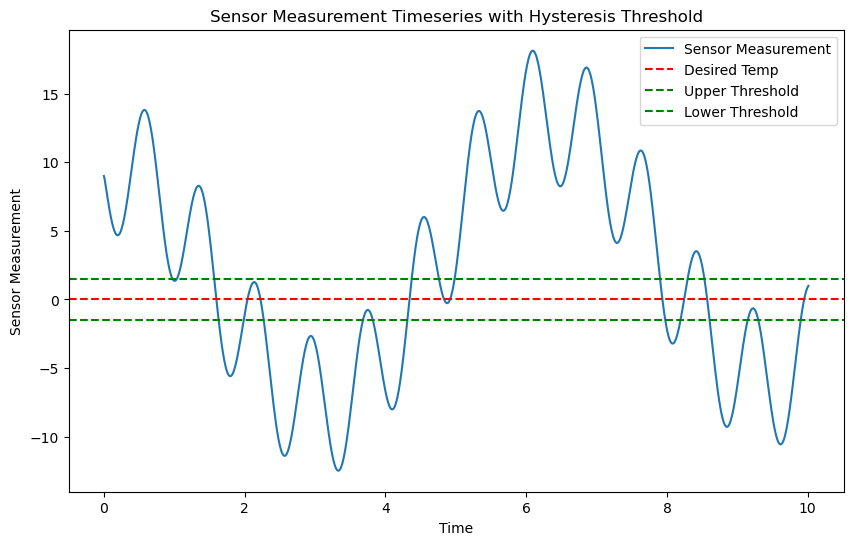

5


In [76]:
## Test the threshold crossing counter function

# define the parameters for the test
t_start = 0.0
t_stop = 10.01
temp_desired = 0.0
hyst_alpha = 1.5
c0 = -0.1
c1 = 2.0
c2 = 10.0
c3 = -5.0
c4 = -1.0

# OPTIONAL - use the next line to plot the sensor measurement timeseries with the hysteresis threshold
plot_timeseries_and_threshold(t_start, t_stop, c0, c1, c2, c3, c4, temp_desired, hyst_alpha)

# Test the threshold crossing counter function
result = thresh_crossing_counter(temp_desired, hyst_alpha, t_start, t_stop, c0, c1, c2, c3, c4)
print(result)  # Expected output: 5

## Closing remarks: Welcome to the wonderful world of test stubs!
You may be wondering what completing the last function achieved since it does not "read" real sensor data. If you inspect the code, however, you will notice that if we wanted the code to work with a real sensor, we would only need to change the `get_sensor_measurement` function to read the sensor rather than generate a simulated value. The rest of the code would remain the same! Now, as soon as you are ready to test with the real sensor, you will have confidence that your code works correctly and you can debug any problems that arise more efficiently. This practice of creating functions (often called stubs) to simulate or emulate how other parts of your code will operate enables engineers and programmers to incrementally build and test code without needing the whole project to be complete, which makes debugging and testing much more manageable. Powerful stuff!